In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

In [3]:
gdp_df.shape

(7176, 4)

7176 rows

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


country, year, value, value footnotes

In [5]:
type(gdp_df['Country or Area'])

pandas.core.series.Series

In [6]:
type(gdp_df['Value'])

pandas.core.series.Series

In [7]:
gdp_df = gdp_df.drop('Value Footnotes',axis = 1)

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990], dtype=int64)

In [10]:
gdp_df['Country'].value_counts().loc[lambda x : x==31]

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
IDA only                                        31
Fragile and conflict affected situations        31
Ireland                                         31
France                                          31
Italy                                           31
Name: Country, Length: 205, dtype: int64

205

In [11]:
gdp_df['Country'].value_counts().loc[lambda x : x < 20]

Afghanistan                  19
Nauru                        17
Cayman Islands               15
Kosovo                       13
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Somalia                       8
Djibouti                      8
Name: Country, dtype: int64

Z:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_Per_Capita'>

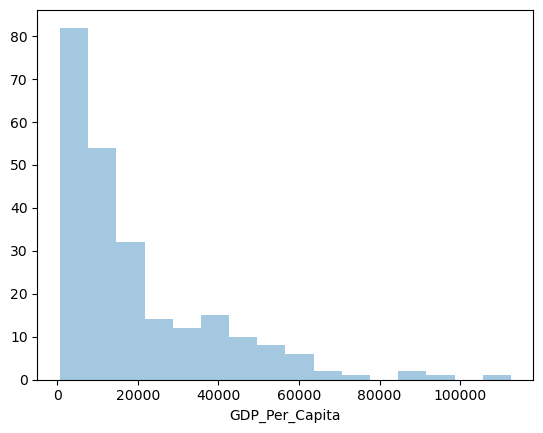

In [12]:
gdp_df2020 = gdp_df[gdp_df['Year'] == 2020]

sns.distplot( a=gdp_df2020["GDP_Per_Capita"], hist=True, kde=False, rug=False )

In [13]:
gdp_df2020.median()

C:\Users\zenit\AppData\Local\Temp\ipykernel_3056\2382455831.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gdp_df2020.median()


Year               2020.000000
GDP_Per_Capita    12908.937406
dtype: float64

12908

In [14]:
decades_gdp = gdp_df.loc[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
decades_gdp

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

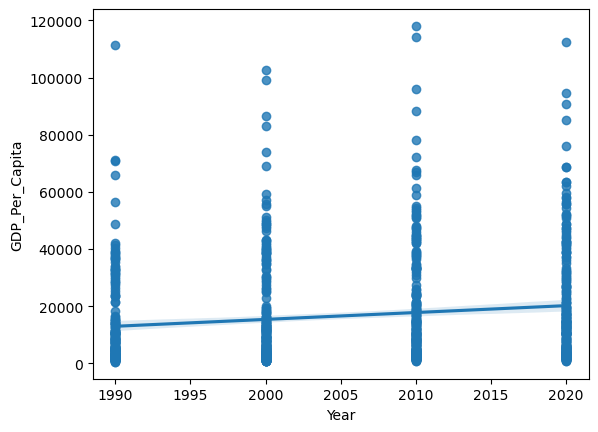

In [15]:
sns.regplot(x=decades_gdp["Year"], y=decades_gdp["GDP_Per_Capita"])

gdp has increased

In [16]:
gdpover = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
gdpover

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


In [17]:
gdpover.query('Year == Year.min()')

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


In [18]:
gdp_df2020.query('GDP_Per_Capita == GDP_Per_Capita.max()')

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


UAE 1990 and Luxem 2020

In [19]:
gdplux = gdp_df[gdp_df['Country'] == 'Luxembourg' ]
gdplux

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


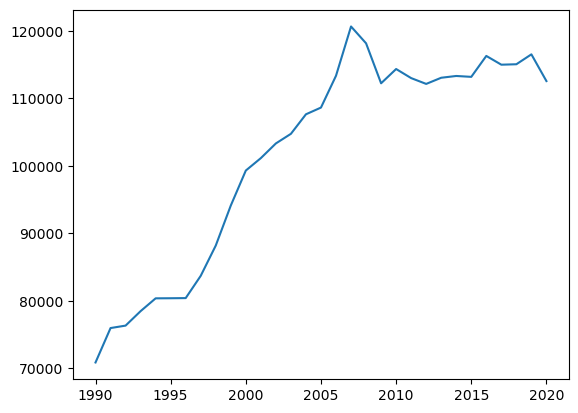

In [20]:
plt.plot(gdplux.Year,gdplux.GDP_Per_Capita)

In [21]:
gdp_df2020.query('GDP_Per_Capita == GDP_Per_Capita.min()')

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


burundi

In [22]:
gdpbur = gdp_df[gdp_df['Country'] == 'Burundi' ]

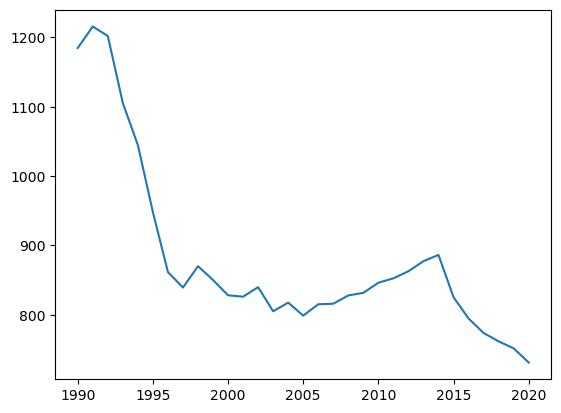

In [23]:
plt.plot(gdpbur.Year,gdpbur.GDP_Per_Capita)

In [24]:
int_df = pd.read_csv('..\data\internet_use.csv', nrows = 4495)

In [25]:
int_df = int_df.drop('Value Footnotes',axis = 1)

In [26]:
int_df.columns = ['Country', 'Year', 'Users_pct']

In [27]:
int_df_c = int_df[int_df['Country'] == 'United States']

years are from 1990 to 2014

In [28]:
int_df.query('Year == 1990 & Users_pct > 0')

,Country,Year,Users_pct
204,Australia,1990,0.585095
229,Austria,1990,0.130369
375,Belgium,1990,0.001007
728,Canada,1990,0.361000
1107,Denmark,1990,0.097277
1388,Finland,1990,0.401088
1413,France,1990,0.052778
1535,Germany,1990,0.125892
2023,Israel,1990,0.110774
2048,Italy,1990,0.017545


In [29]:
decades_int = int_df.loc[int_df['Year'].isin([ 2000, 2014])]

<AxesSubplot:xlabel='Year', ylabel='Users_pct'>

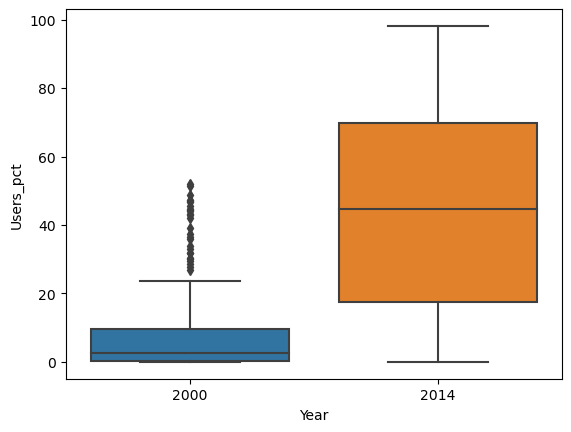

In [30]:
sns.boxplot( x=decades_int["Year"], y=decades_int["Users_pct"] )

In [31]:
int_2014 = int_df[int_df['Year'] == 2014]

In [32]:
int_5 = int_2014[int_2014['Users_pct'] < 5]
int_5.describe()

,Year,Users_pct
count,16.0,16.000000
mean,2014.0,2.332500
std,0.0,1.254483
min,2014.0,0.000000
25%,2014.0,1.567500
50%,2014.0,2.100000
75%,2014.0,3.080000
max,2014.0,4.860000


16 countries

In [33]:
int_df.query('Year == 2014 & Users_pct < 5').count()

Country      16
Year         16
Users_pct    16
dtype: int64

In [34]:
gdp_int = pd.merge(int_df, gdp_df, 
                               on = ['Country', 'Year'], 
                               how = 'outer')


gdp_int

,Country,Year,Users_pct,GDP_Per_Capita
0,Afghanistan,2014,6.390000,2102.384604
1,Afghanistan,2013,5.900000,2116.465258
2,Afghanistan,2012,5.454545,2075.491614
3,Afghanistan,2011,5.000000,1904.559926
4,Afghanistan,2010,4.000000,1957.029070
...,...,...,...,...
8251,Zimbabwe,2016,NaN,2341.304920
8252,Zimbabwe,2015,NaN,2360.022385
8253,Zimbabwe,1993,NaN,2420.092791
8254,Zimbabwe,1992,NaN,2437.152908


In [35]:
gdp_int.query('Year == 2014 & Users_pct == Users_pct.nlargest(4)')

,Country,Year,Users_pct,GDP_Per_Capita
415,Bermuda,2014,96.80,77361.104881
1866,Iceland,2014,98.16,50450.741612
3016,Norway,2014,96.30,62390.130313


bermuda, iceland, norway

In [36]:
bin_df = gdp_int.loc[gdp_int['Country'].isin([ 'Iceland', 'Bermuda', 'Norway'])]
bin_df

,Country,Year,Users_pct,GDP_Per_Capita
415,Bermuda,2014,96.800000,77361.104881
416,Bermuda,2013,95.300000,80503.650291
417,Bermuda,2012,91.299305,80982.367755
418,Bermuda,2011,88.336000,85829.378260
419,Bermuda,2010,84.210000,88399.915949
...,...,...,...,...
7093,Norway,2019,NaN,64385.005993
7094,Norway,2018,NaN,64341.258681
7095,Norway,2017,NaN,64050.756165
7096,Norway,2016,NaN,63104.080782


sns.FacetGrid(bin_df, row = 'GDP_Per_Capita', col = 'Users_pct' ) not working

In [38]:
gdp_int_2014 = gdp_int[gdp_int['Year'] == 2014]
gdp_int_2014

,Country,Year,Users_pct,GDP_Per_Capita
0,Afghanistan,2014,6.39,2102.384604
15,Albania,2014,60.10,11586.833878
36,Algeria,2014,18.09,11512.690472
59,Andorra,2014,95.90,NaN
78,Angola,2014,21.26,8240.347981
...,...,...,...,...
8032,Tuvalu,2014,NaN,3497.520822
8094,Upper middle income,2014,NaN,14564.823543
8155,Vietnam,2014,NaN,7601.858491
8186,West Bank and Gaza,2014,NaN,5967.073437


<AxesSubplot:xlabel='Users_pct', ylabel='GDP_Per_Capita'>

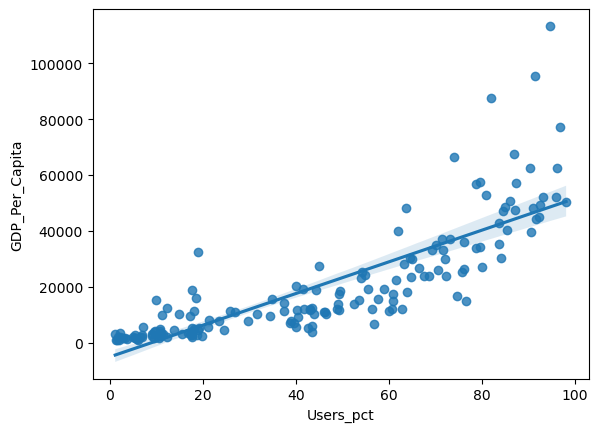

In [40]:
sns.regplot(x=gdp_int_2014["Users_pct"], y=gdp_int_2014["GDP_Per_Capita"])

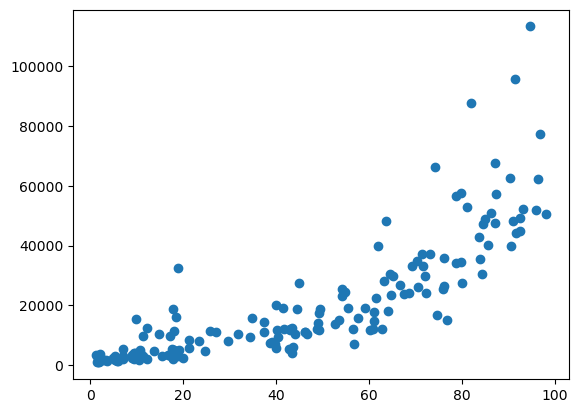

In [43]:
plt.plot( 'Users_pct', 'GDP_Per_Capita', data=gdp_int_2014, linestyle='none', marker='o')

In [44]:
gdp_int_2014.query('Users_pct > 90')

,Country,Year,Users_pct,GDP_Per_Capita
59,Andorra,2014,95.90000,NaN
271,Bahrain,2014,90.99998,48201.157172
415,Bermuda,2014,96.80000,77361.104881
1083,Denmark,2014,95.99000,52048.335493
1320,Faroe Islands,2014,94.66000,NaN
1364,Finland,2014,92.38000,44976.776449
1866,Iceland,2014,98.16000,50450.741612
2071,Japan,2014,90.58000,39739.541124
2371,Liechtenstein,2014,95.21000,NaN
2407,Luxembourg,2014,94.67000,113313.578898
